Tasks:
1. Data Exploration
2. Temporal Analysis
3. Geographical Analysis
4. Correlation Analysis
5. Feature-specific Analysis
6. Box Plot for All Attributes
7. Exit
Enter main task number (1-7): 5
Feature-specific Analysis Subtasks:
1. Explore the LDAPS features and display information from the CSV file
2. Visualize the relationships between LDAPS features and other key variables
3. Analyze the impact of cloud cover and precipitation on temperature
4. Plot individual box plots for all attributes except the date attribute
Enter subtask number (1-4): 2


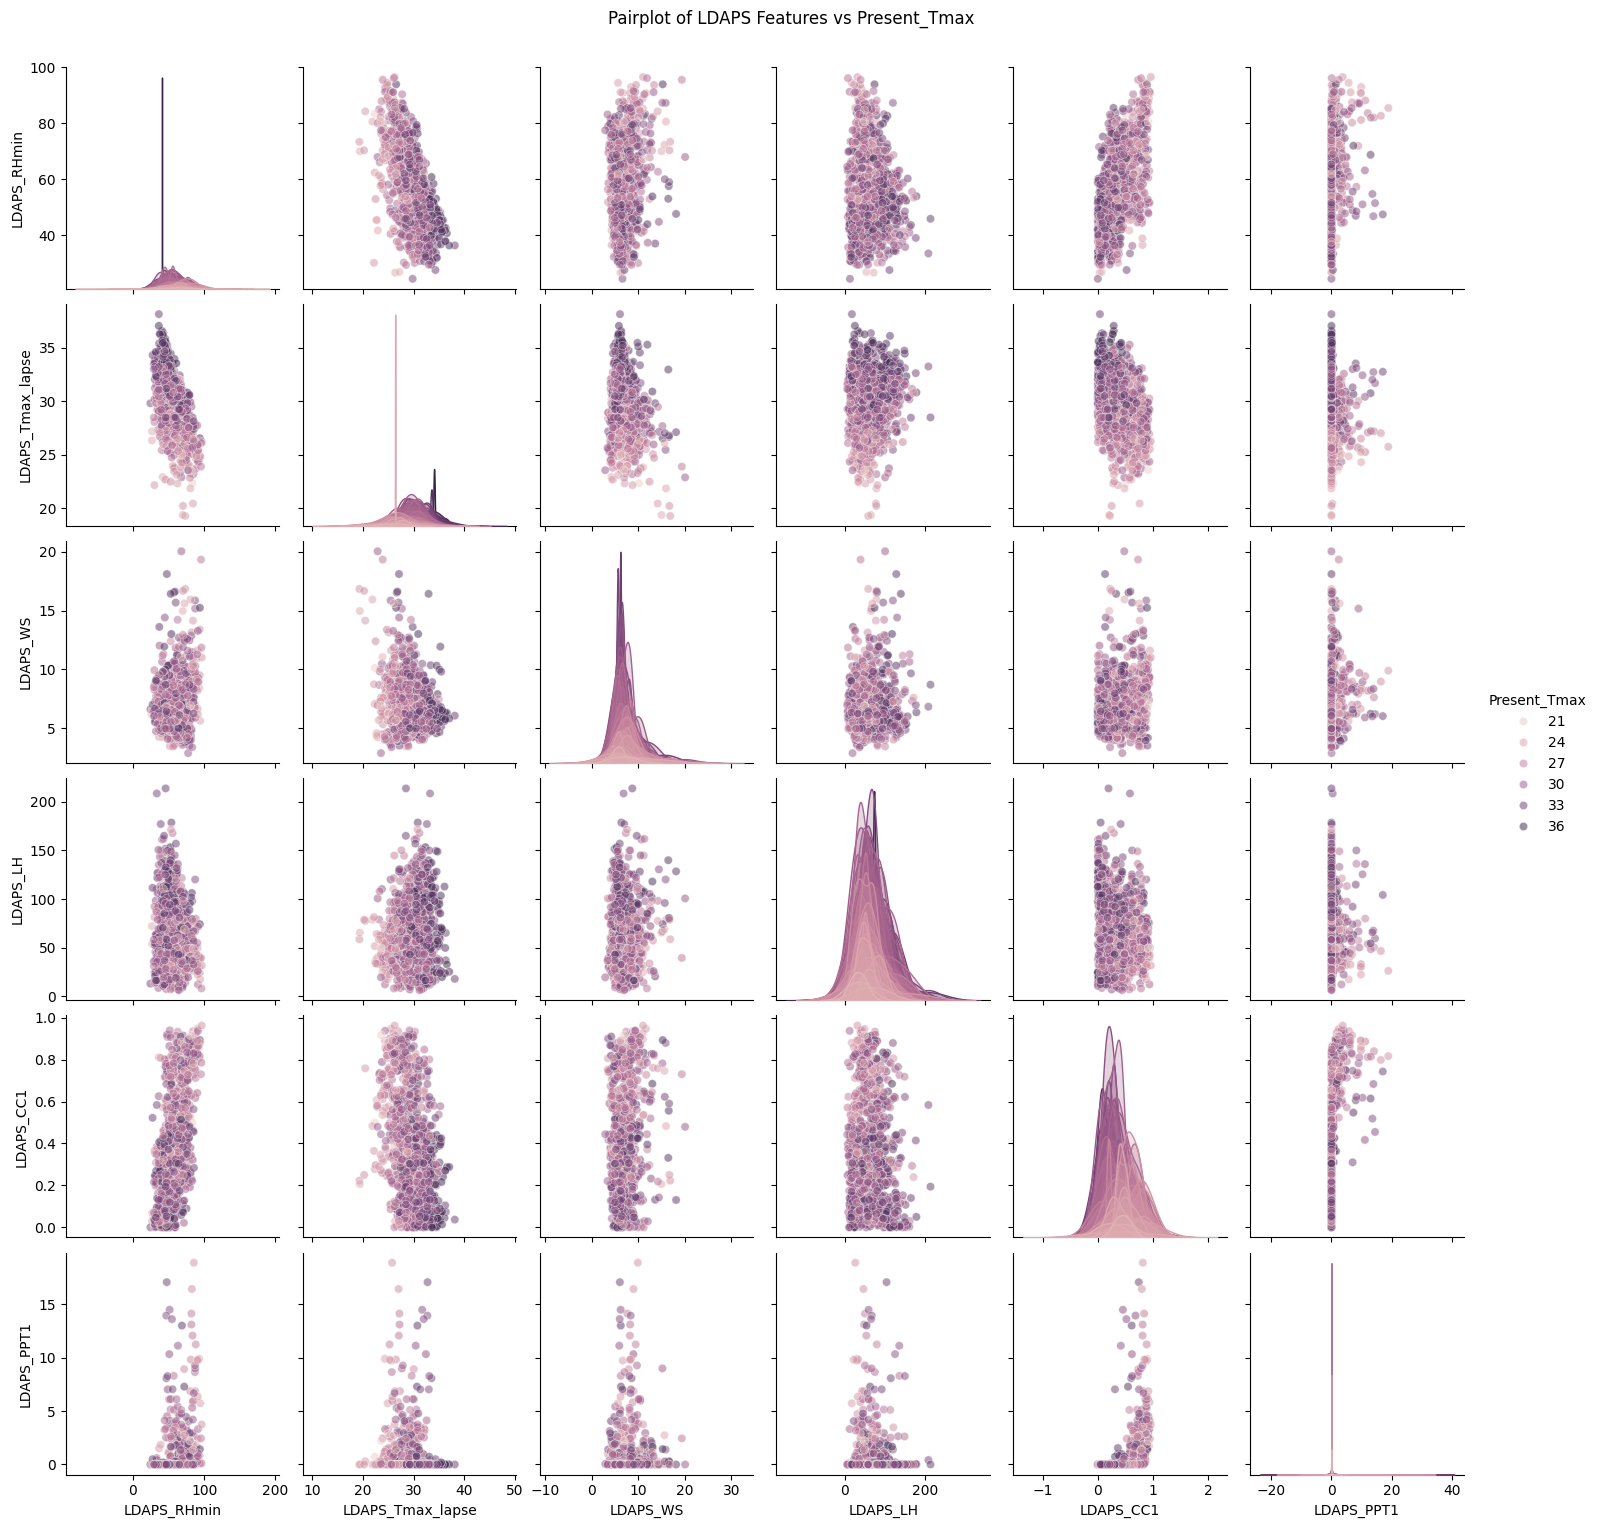

Tasks:
1. Data Exploration
2. Temporal Analysis
3. Geographical Analysis
4. Correlation Analysis
5. Feature-specific Analysis
6. Box Plot for All Attributes
7. Exit


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt

dataset_path = r"/content/Bias_correction_ucl.csv"
df = pd.read_csv(dataset_path)

while True:
    # Prompt user for main task
    print("Tasks:")
    print("1. Data Exploration")
    print("2. Temporal Analysis")
    print("3. Geographical Analysis")
    print("4. Correlation Analysis")
    print("5. Feature-specific Analysis")
    print("6. Box Plot for All Attributes")
    print("7. Exit")

    main_task = int(input("Enter main task number (1-7): "))

    if main_task == 7:
        print("Exiting. Goodbye!")
        break

    # Task 1: Data Exploration
    if main_task == 1:
        print("Data Exploration Subtasks:")
        print("1. Display dimension, shape, size, and attributes type")
        print("2. Display the first few rows")
        print("3. Provide summary statistics for key features")
        print("4. Identify and handle missing values or outliers")

        subtask = int(input("Enter subtask number (1-4): "))

        # Subtask 1: Display dimension, shape, size, and attributes type
        if subtask == 1:
            print("Dimension:", df.ndim)
            print("Shape:", df.shape)
            print("Size:", df.size)
            print("Attribute Types:\n", df.dtypes)

        # Subtask 2: Display the first few rows
        elif subtask == 2:
            print("First Few Rows:\n", df.head())

        # Subtask 3: Provide summary statistics for key features
        elif subtask == 3:
            print("Summary Statistics:\n", df.describe())

        # Subtask 4: Identify and handle missing values or outliers
        elif subtask == 4:
            # Example: df = df.dropna()  # Drop rows with missing values
            # Example: df = df[(df['Present_Tmax'] > lower_bound) & (df['Present_Tmax'] < upper_bound)]  # Handle outliers
            print("Missing values by column: ")
            print(df.isnull().sum())
            print("\n")
            print(f"Total missing values in the dataset are {df.isnull().sum().sum()}.")
            print("\n")
            df1=df.dropna(axis=0)
            print(f"Shape after dropping rows with missing values: {df1.shape}")
            print("Identified and handled missing values or outliers.")

    # Task 2: Temporal Analysis
    elif main_task == 2:

      print("Temporal Analysis Subtasks:")
      print("1. Explore the temporal aspect and display information from the CSV file")
      print("2. Visualize the variation in temperature over different years")

      subtask = int(input("Enter subtask number (1-2): "))

      # Subtask 1: Explore the temporal aspect and display information from the CSV file
      if subtask == 1:
          # Convert 'Date' to datetime type
          df['Date'] = pd.to_datetime(df['Date'])

          print("Temporal Information from CSV File:")
          print("Start Date:", df['Date'].min())
          print("End Date:", df['Date'].max())
          print("Total Duration:", df['Date'].max() - df['Date'].min())

      # Subtask 2: Visualize the variation in temperature over different years
      elif subtask == 2:
          # Convert 'Date' to datetime type
          df['Date'] = pd.to_datetime(df['Date'])

          plt.figure(figsize=(12, 6))
          df.set_index('Date')['Present_Tmax'].resample('Y').mean().plot(label='Present_Tmax')
          df.set_index('Date')['Present_Tmin'].resample('Y').mean().plot(label='Present_Tmin')
          plt.title('Temperature Variation Over Years')
          plt.xlabel('Year')
          plt.ylabel('Temperature (°C)')
          plt.legend()
          plt.show()
          plt.figure(figsize=(12,4), dpi=100)
          df['Date']=pd.to_datetime(df['Date'])
          x=df['Date'].dt.year
          plt.plot(x, df["Present_Tmax"], color='tab:red')
          plt.plot(x, df["Present_Tmin"], color='tab:blue')
          plt.gca().set(title='Variation of Temperature over years', xlabel="Year", ylabel="Temperature")
          plt.show()

    # Task 3: Geographical Analysis
    elif main_task == 3:
        print("Geographical Analysis Subtasks:")
        print("1. Explore geographical features and display information from the CSV file")
        print("2. Visualize the distribution of weather stations on a map")
        print("3. Analyze how elevation (DEM) and slope impact temperature")

        subtask = int(input("Enter subtask number (1-3): "))

        # Subtask 1: Explore geographical features and display information from the CSV file
        if subtask == 1:
            print("Geographical Information from CSV File:")
            print("Latitude Range:", df['lat'].min(), "to", df['lat'].max())
            print("Longitude Range:", df['lon'].min(), "to", df['lon'].max())
            print("Elevation Range:", df['DEM'].min(), "to", df['DEM'].max())
            print("Slope Range:", df['Slope'].min(), "to", df['Slope'].max())

        # Subtask 2: Visualize the distribution of weather stations on a map
        elif subtask == 2:
            sns.scatterplot(x=df['lat'],y=df['lon'], hue=df['station'])
            plt.show()
            sns.scatterplot(x=df['DEM'],y=df['Slope'], hue=df['Present_Tmax'])
            plt.show()
            sns.scatterplot(x=df['DEM'],y=df['Slope'], hue=df['Present_Tmin'])
            plt.show()

        # Subtask 3: Analyze how elevation (DEM) and slope impact temperature
        elif subtask == 3:
            plt.figure(figsize=(12, 6))
            plt.scatter(df['DEM'], df['Present_Tmax'], alpha=0.5, label='Present_Tmax')
            plt.scatter(df['DEM'], df['Present_Tmin'], alpha=0.5, label='Present_Tmin')
            plt.title('Impact of Elevation on Temperature')
            plt.xlabel('Elevation (m)')
            plt.ylabel('Temperature (°C)')
            plt.legend()
            plt.show()

    # Task 4: Correlation Analysis
    elif main_task == 4:
        print("Correlation Analysis Subtasks:")
        print("1. Calculate and visualize the correlation matrix for numerical features")
        print("2. Identify highly correlated features")

        subtask = int(input("Enter subtask number (1-2): "))

        # Subtask 1: Calculate and visualize the correlation matrix for numerical features
        if subtask == 1:
            correlation_matrix = df.corr()
            plt.figure(figsize=(12, 8))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
            plt.title('Correlation Matrix')
            plt.show()
            print("completed task 4 subtask1")

        # Subtask 2: Identify highly correlated features
        elif subtask == 2:
            print(df.corr())
            sns.heatmap(df.corr(), annot=False)
            plt.show()
            correlation_matrix = df.corr()

            # Set a correlation threshold
            correlation_threshold = 0.8

            # Identify highly correlated features
            highly_correlated_features = []
            for i in range(len(correlation_matrix.columns)):
              for j in range(i):
                if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
                  feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
                  highly_correlated_features.append(feature_pair)

            if len(highly_correlated_features) > 0:
              print("Highly Correlated Features:")
              for pair in highly_correlated_features:
                print(f"{pair[0]} and {pair[1]}: {correlation_matrix.loc[pair[0], pair[1]]}")
            else:
              print("No highly correlated features found.")

    # Task 5: Feature-specific Analysis
    elif main_task == 5:
        print("Feature-specific Analysis Subtasks:")
        print("1. Explore the LDAPS features and display information from the CSV file")
        print("2. Visualize the relationships between LDAPS features and other key variables")
        print("3. Analyze the impact of cloud cover and precipitation on temperature")
        print("4. Plot individual box plots for all attributes except the date attribute")

        subtask = int(input("Enter subtask number (1-4): "))

        # Subtask 1: Explore the LDAPS features and display information from the CSV file
        if subtask == 1:
            print("LDAPS Features Information from CSV File:")
            ldaps_features = ['LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
            for feature in ldaps_features:
                print(f"{feature} Range: {df[feature].min()} to {df[feature].max()}")

        # Subtask 2: Visualize the relationships between LDAPS features and other key variables
        elif subtask == 2:
            # Randomly sample 1000 rows for visualization
            ldaps_features_sample = df.sample(n=1000)[['LDAPS_RHmin', 'LDAPS_Tmax_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_PPT1', 'Present_Tmax']]
            sns.pairplot(ldaps_features_sample, hue='Present_Tmax', plot_kws={'alpha': 0.5})
            plt.suptitle('Pairplot of LDAPS Features vs Present_Tmax', y=1.02)
            plt.show()

        # Subtask 3: Analyze the impact of cloud cover and precipitation on temperature
        elif subtask == 3:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='LDAPS_CC1', y='Present_Tmax', data=df.sample(n=1000))
            plt.title('Impact of LDAPS_CC1 on Present_Tmax')
            plt.xlabel('LDAPS_CC1')
            plt.ylabel('Present_Tmax')
            plt.show()

            plt.figure(figsize=(12, 6))
            sns.boxplot(x='LDAPS_PPT1', y='Present_Tmax', data=df.sample(n=1000))
            plt.title('Impact of LDAPS_PPT1 on Present_Tmax')
            plt.xlabel('LDAPS_PPT1')
            plt.ylabel('Present_Tmax')
            plt.show()

        # Subtask 4: Plot individual box plots for all attributes except the date attribute
        elif subtask == 4:
            plt.figure(figsize=(16, 8))
            sns.boxplot(data=df.drop(['Date'], axis=1).sample(n=1000))
            plt.title('Box Plot for All Attributes (Sampled)')
            plt.xticks(rotation=45, ha='right')
            plt.show()
      # Task 6: Box Plot for All Attributes
    elif main_task == 6:


      plt.figure(figsize=(16, 8))
      sns.boxplot(data=df.drop('Date', axis=1))
      plt.title('Box Plot for All Attributes')
      plt.xticks(rotation=45, ha='right')
      plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime